In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import missingno as mso
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 
        
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [4]:
df= pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

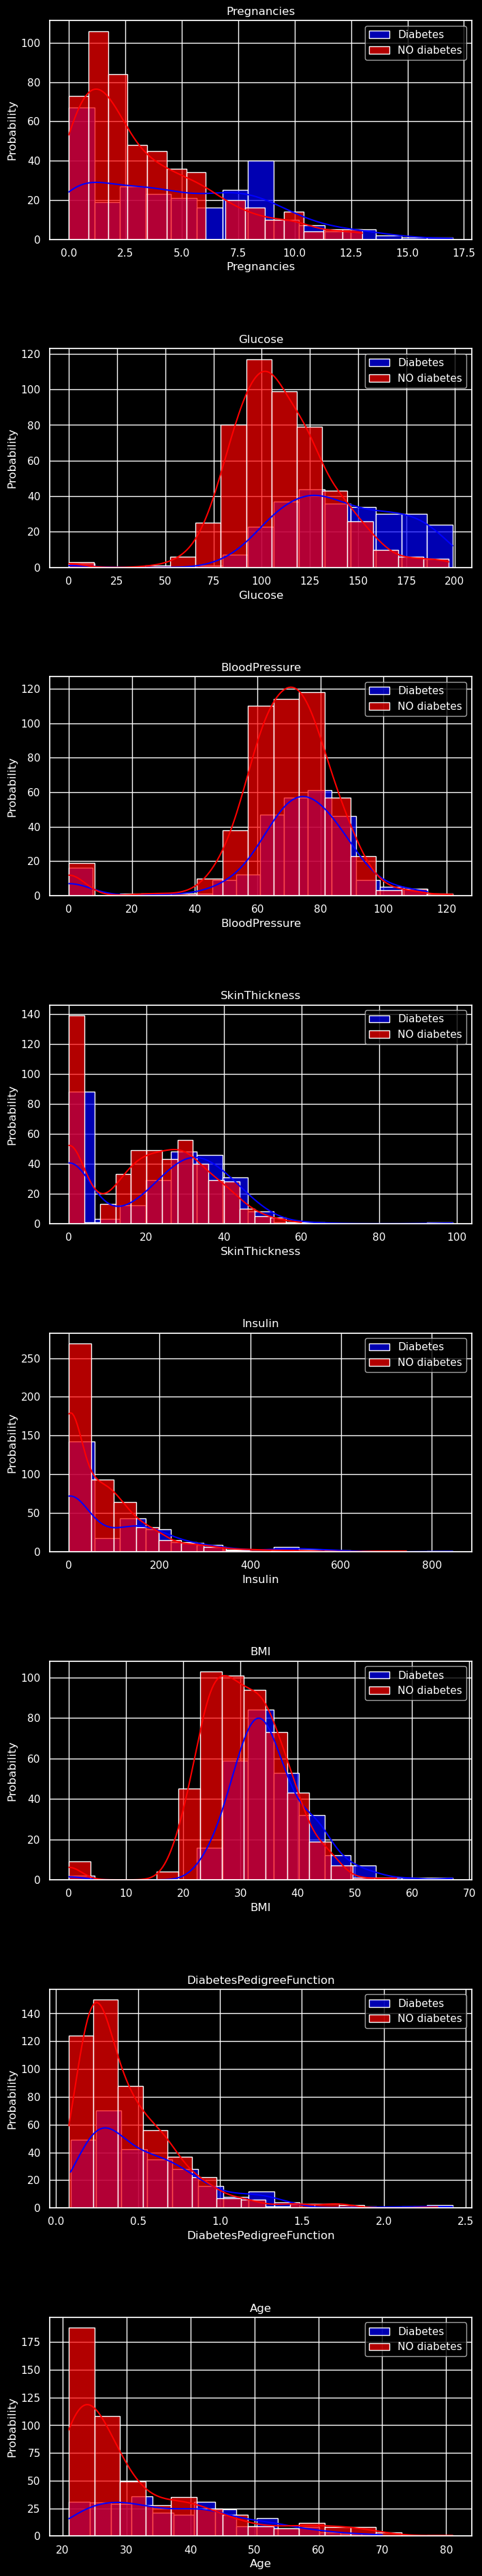

In [6]:
sns.set(style="dark")
plt.style.use('dark_background')

num_columns = len(df.columns[:-1])
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, 6*num_columns))
plt.subplots_adjust(hspace=0.5)  

for i, label in enumerate(df.columns[:-1]):
    ax = axes[i]
    
    sns.histplot(data=df[df['Outcome'] == 1], x=label, color='blue', label='Diabetes', alpha=0.7, ax=ax, bins=15, kde=True)
    sns.histplot(data=df[df['Outcome'] == 0], x=label, color='red', label='NO diabetes', alpha=0.7, ax=ax, bins=15, kde=True)
    
    ax.set_title(label)
    ax.set_ylabel('Probability')
    ax.set_xlabel(label)
    ax.legend()
    
    ax.grid(True)  # Add grid lines
    
plt.show()

**Handling the Missing Values**

In [7]:
df.dropna()
data= df.drop(0)
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[767 rows x 9 columns]

In [8]:
#creating a copy of the dataset using copy().
data1=data.copy()
# to get the index in the data set using index attribute.
data.index
# to get the shape of the dataset using shape attribute.
data.shape
# to get the column names of the dataset using columns.
data.columns
# to get the size of the dataset using size attribute.
data.size
# to get the dimension of the dataset using ndim attribute.
data.ndim
# to get the memory usage.
data.memory_usage()
# to print the first ten data entries using head().
data.head(3)
# to print the last ten data entries using head().
data.tail(3)
# to get the features and its data type using info()
data.info()
# to obtain the data types of each column.
data.dtypes
# to obtain the counts of same data type.
data.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


int64      7
float64    2
dtype: int64

In [9]:
# to obtain the summary statistics.
print(data.describe())
# to obtain the count of each column.
print(data.count())
# to obtain the values of each column.
print(data.values)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   767.000000  767.000000     767.000000     767.000000  767.000000   
mean      3.842243  120.859192      69.101695      20.517601   79.903520   
std       3.370877   31.978468      19.368155      15.954059  115.283105   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   32.000000   
75%       6.000000  140.000000      80.000000      32.000000  127.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  767.000000                767.000000  767.000000  767.000000  
mean    31.990482                  0.471674   33.219035    0.348110  
std      7.889091                  0.331497   11.752296    0.476682  
min      0.000000                  

In [10]:
#determine the presence of missing values.
print(data.isna())
#Get the count of missing values.
print(data.isna().sum())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
5          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
1                       False  False    False  
2  

*******************************************
.: Total Missing Values in each Columns :.
*******************************************


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

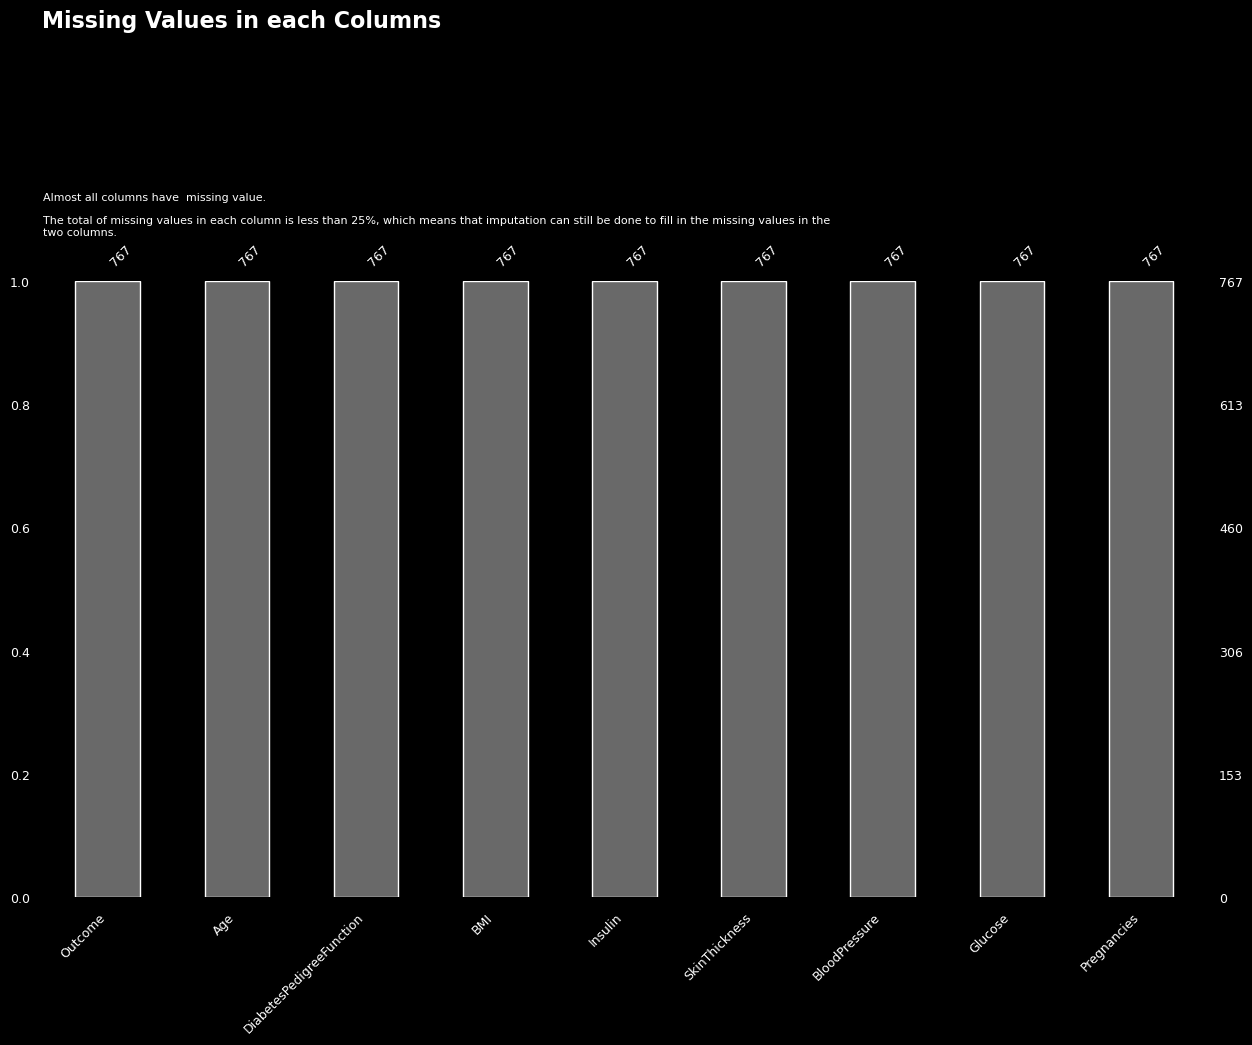

In [11]:
# --- Plot Missing Values ---
mso.bar(data, fontsize=9, 
        figsize=(15, 8), sort='descending', labels=True)

# --- Title & Subtitle Settings ---
plt.suptitle('Missing Values in each Columns', fontweight='heavy', x=0.124, y=1.22, ha='left',fontsize='16', 
             fontfamily='sans-serif')
plt.title('Almost all columns have  missing value.\n\nThe total of missing values in each column is less than 25%, which means that imputation can still be done to fill in the missing values in the\ntwo columns.', 
          fontsize='8', fontfamily='sans-serif', loc='left', pad=5)
plt.grid(axis='both', alpha=0);

# --- Total Missing Values in each Columns ---
print('\033[36m*' * 43)
print('\033[1m'+'.: Total Missing Values in each Columns :.'+'\033[0m')
print('\033[36m*' * 43+'\033[0m')
data.isnull().sum()

In [12]:
data.dropna()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[767 rows x 9 columns]

In [13]:
#using IQR method , checking for outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print('outliers count of each column')
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

outliers count of each column


Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [14]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Feature Selection**

In [15]:
#dropping the class label
X= data.drop(['Outcome'],axis=1)
y=data['Outcome']

**Normalization**

In [16]:
#performing normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

#Using the minmax scaler to perform normalization
scaler=MinMaxScaler()
print(scaler.fit(X))
print(scaler.data_max_)
print(scaler.data_min_)
X=scaler.transform(X)

MinMaxScaler()
[ 17.   199.   122.    99.   846.    67.1    2.42  81.  ]
[ 0.     0.     0.     0.     0.     0.     0.078 21.   ]


**Train Test Split**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Machine Learning Models**

**Naive Bayes**

GaussianNBModel Train Score is :  0.7553017944535073
GaussianNBModel Test Score is :  0.8051948051948052


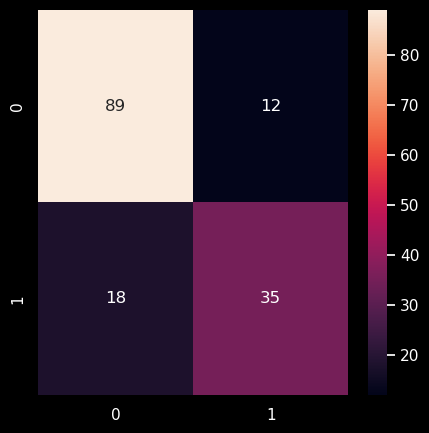

In [18]:
GaussianNBModel = GaussianNB() 
GaussianNBModel.fit(X_train, y_train)
print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(X_train, y_train))
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(X_test, y_test))

y_pred = GaussianNBModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

GaussianNBModelscoretrain = GaussianNBModel.score(X_train, y_train)
GaussianNBModelscoretest = GaussianNBModel.score(X_test, y_test)

**Decision Tree**

DecisionTreeClassifierModel Train Score is :  0.7716150081566069
DecisionTreeClassifierModel Test Score is :  0.7727272727272727


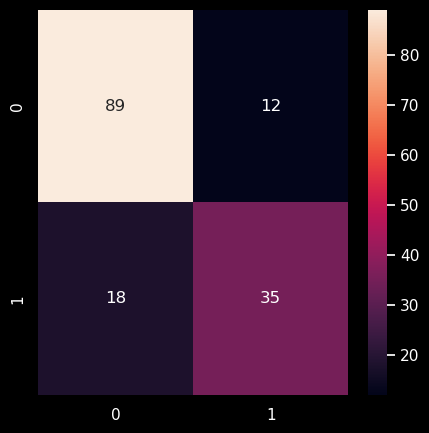

In [19]:
DecisionTreeClassifierModel=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
DecisionTreeClassifierModel.fit(X_train, y_train)

#caclculating details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

DecisionTreeClassifierModeltrain =  DecisionTreeClassifierModel.score(X_train, y_train)
DecisionTreeClassifierModeltest = DecisionTreeClassifierModel.score(X_test, y_test)

**Random Forest Classifier**

RandomForestClassifierModel Train Score is :  0.7601957585644372
RandomForestClassifierModel Test Score is :  0.7922077922077922


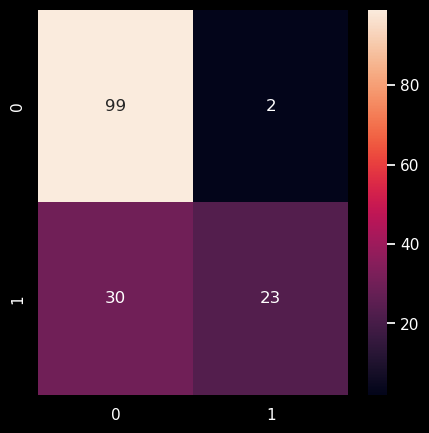

In [20]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
y_pred = RandomForestClassifierModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)
RandomForestClassifierModeltrain =  RandomForestClassifierModel.score(X_train, y_train)
RandomForestClassifierModeltest = RandomForestClassifierModel.score(X_test, y_test)

In [21]:
importance = RandomForestClassifierModel.feature_importances_
columns =['Pregnancies','Glucose'	,'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction','Age']
i=0
while i < len(columns):
  print(f"the importance of features'{columns[i]}'is {round(importance[i]* 100,2)} %.")
  i+=1

the importance of features'Pregnancies'is 8.93 %.
the importance of features'Glucose'is 37.68 %.
the importance of features'BloodPressure'is 4.38 %.
the importance of features'SkinThickness'is 4.39 %.
the importance of features'Insulin'is 5.97 %.
the importance of features'BMI'is 16.49 %.
the importance of features'DiabetesPedigreeFunction'is 8.11 %.
the importance of features'Age'is 14.06 %.


In [26]:
models = pd.DataFrame({
                          'Model': [
                                    'Naive Bayes', 
                                    "Decision Tree",
                                    "Random forest",
                                    
                                  ],
                       
                          'Scoretrain': [GaussianNBModelscoretrain, 
                                         DecisionTreeClassifierModeltrain, 
                                         RandomForestClassifierModeltrain,

                                        ],
                       
                             'scoretest':[GaussianNBModelscoretest,
                                          DecisionTreeClassifierModeltest,
                                          RandomForestClassifierModeltest,
                                          ]})

print(tabulate(models , headers = ['Model' , 'Train' , 'Test'] , tablefmt = 'pretty', showindex =False))

print("Naive Bayes predictions:", nb_predictions)
print("Naive Bayes accuracy:", nb_accuracy)
print("\nDecision Tree predictions:", dt_predictions)
print("Decision Tree accuracy:", dt_accuracy)
print("\nRandom Forest predictions:", rf_predictions)
print("Random Forest accuracy:", rf_accuracy)


+---------------+--------------------+--------------------+
|     Model     |       Train        |        Test        |
+---------------+--------------------+--------------------+
|  Naive Bayes  | 0.7553017944535073 | 0.8051948051948052 |
| Decision Tree | 0.7716150081566069 | 0.7727272727272727 |
| Random forest | 0.7601957585644372 | 0.7922077922077922 |
+---------------+--------------------+--------------------+
Naive Bayes predictions: [1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0
 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 1 0 0]
Naive Bayes accuracy: 0.8051948051948052

Decision Tree predictions: [0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 1 1 0 0 0 1

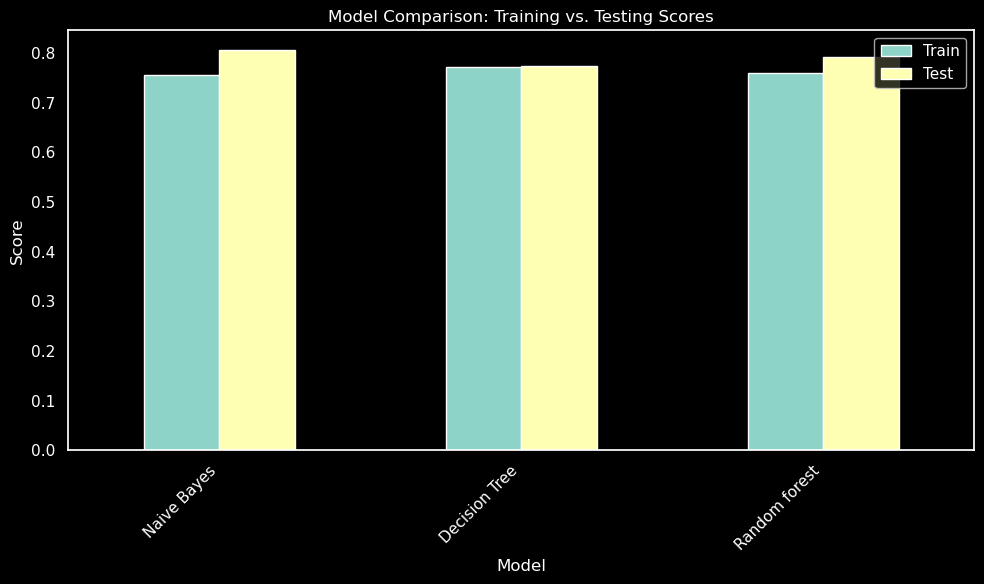

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

models.set_index('Model')[['Scoretrain', 'scoretest']].plot(kind='bar', ax=ax)

ax.set_ylabel('Score')
ax.set_xlabel('Model')
ax.set_title('Model Comparison: Training vs. Testing Scores')

ax.legend(["Train", "Test"])

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()